In [2]:
from utils.utils import *
from utils.Algorithms import *
from utils.GraphCreation import *
from utils.Metrics import *
import pandas as pd
np.random.seed(0)

In [4]:
HIGH = 0.8
MEDIUM = 0.5
LOW = 0.3

We test different parameters for $\alpha$ and $\beta$ in the SC-GED algorithm.

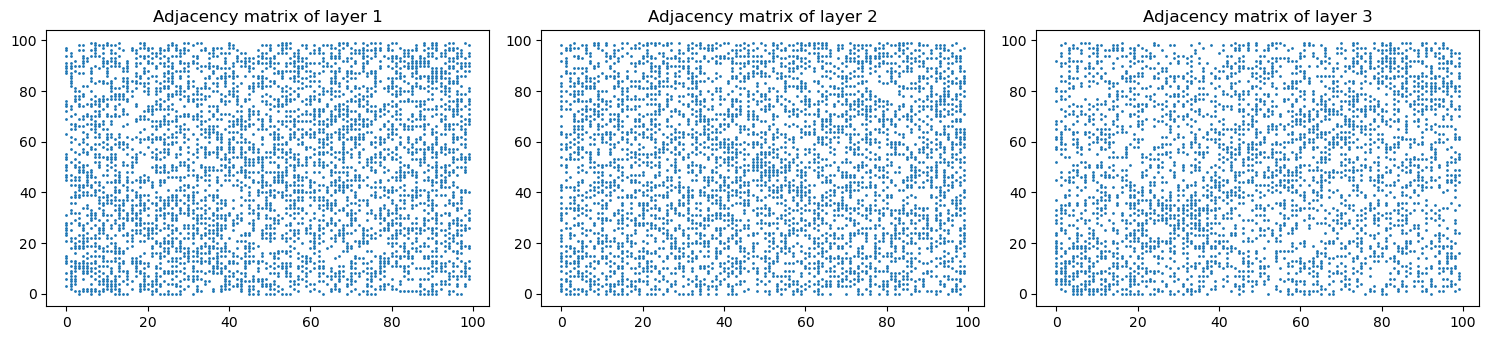

,alpha,beta,NMI,Purity,RI
0,0.5,1.0,0.043,0.29,0.682
1,0.5,10.0,0.030,0.28,0.678
2,0.5,100.0,0.027,0.26,0.680
3,1.0,1.0,0.040,0.28,0.684
4,1.0,10.0,0.028,0.27,0.677
5,1.0,100.0,0.032,0.27,0.681
6,5.0,1.0,0.058,0.31,0.672
7,5.0,10.0,0.043,0.30,0.684
8,5.0,100.0,0.032,0.27,0.681
9,10.0,1.0,0.042,0.30,0.666


In [9]:
n = 100
M = 3 #three layers
k = 5

p = MEDIUM

prob = np.full((k,M),p) #people belonging to the same cluster are connected with probability p

algorithms = [SC_SR, randomSC_SR, ourSC_SR]
metrics = [Purity, NMI, RI]


prob_prime1 = np.full((k,k),p - 0.1) #in the first layer, people that do not belong to the same cluster are connected with probability p - 0.1
prob_prime2 = np.full((k,k),p - 0.1) #in the second layer, people that do not belong to the same cluster are connected with probability p - 0.1
prob_prime3 = np.full((k,k),p - 0.2) #in the third layer, people that do not belong to the same cluster are connected with probability p - 0.2

prob_prime = np.stack((prob_prime1,prob_prime2,prob_prime3),axis=2)
clusters_size = k*[20]

matrix,true_clusters = graphCreation(n,M,k,clusters_size,prob,prob_prime, plot_adj = True)

res = pd.DataFrame(columns=['alpha', 'beta', 'NMI', 'Purity', 'RI'])
for alpha in [0.5, 1, 5 , 10, 50]:
    for beta in [1, 10, 100]:
        mu_seq_SCSR = [alpha, beta]
        predictions, run_time = SC_GED(matrix,k, alpha = alpha, beta = beta)
        nmi = NMI(predictions, true_clusters)
        purity = Purity(predictions, true_clusters)
        ri = RI(predictions, true_clusters)
        res = res.append({'alpha': alpha, 'beta': beta, 'NMI': nmi, 'Purity': purity, 'RI': ri}, ignore_index=True)
        res = round(res, 3)


res
